In [1]:
!pip install rdkit

In [131]:
pip install xgboost

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, RFE, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, cross_val_predict
from scipy.stats import uniform
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from scipy.stats import randint

In [ ]:
# Basic data handling and visualization libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# RDKit for chemistry applications
from rdkit import Chem
from rdkit.Chem import Descriptors

# Machine Learning: model selection and evaluation tools
from sklearn.model_selection import (KFold, GridSearchCV, RandomizedSearchCV,
                                     train_test_split, cross_val_score, cross_val_predict)

# Machine Learning: models and ensemble methods
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor

# Machine Learning: preprocessing and pipeline tools
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

# Machine Learning: metrics and feature selection
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.feature_selection import SelectKBest, RFE, f_regression

# Statistical distributions for randomized searches
from scipy.stats import randint, uniform

In [113]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DATA BASE_CO2 Uptake Prediction in Metal–Organic Frameworks finale.csv', encoding='latin1')
data = data.dropna(how='all')
data = data.dropna(how='all',axis=1)
# Extract smiles
smiles_list = data.iloc[:,5]
data


,Surface Area,Pore Volume,Pressure,Temperature,METAL,SMILE_Organic_linker_1,Numéro_atomique,Masse_molaire__g_mol_,Point_de_fusion__°C_,Point_d'ébullition__°C_,...,3s,3p,3d,4s,4p,4d,4f,5s,5p,CO2 Uptake
0,1270.0,0.71,0.15,298.0,Cu,OC(=O)C1=CC(=CC(=C1)C(O)=O)C(O)=O,29.0,63.55,1085.0,2562.0,...,2.0,6.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.86
1,1270.0,0.71,1.00,298.0,Cu,OC(=O)C1=CC(=CC(=C1)C(O)=O)C(O)=O,29.0,63.55,1085.0,2562.0,...,2.0,6.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,5.27
2,1270.0,0.71,1.00,313.0,Cu,OC(=O)C1=CC(=CC(=C1)C(O)=O)C(O)=O,29.0,63.55,1085.0,2562.0,...,2.0,6.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,2.91
3,2833.0,1.04,35.00,298.0,Zn,C(=O)(C1=CC=C(C=C1)C(=O)O),30.0,65.38,419.5,907.0,...,2.0,6.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,21.70
4,1568.0,1.07,35.00,298.0,Zn,C(=O)(C1=CC(=CC=C1C(=O)O)N)O,30.0,65.38,419.5,907.0,...,2.0,6.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,18.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,147.0,0.10,1.00,298.0,Cu,FC(F)(F)C(C1=CC(=CC=C1)C(=O)O)C2=CC(=CC=C2)C(=O)O,29.0,63.55,1085.0,2562.0,...,2.0,6.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,2.11
232,2850.0,1.00,1.00,273.0,Cu,C1=CC=C(C(=C1)C(=O)O)C2=NN=CC(=C2)C(=O)O,29.0,63.55,1085.0,2562.0,...,2.0,6.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,8.75
233,2850.0,1.00,0.15,273.0,Cu,C1=CC=C(C(=C1)C(=O)O)C2=NN=CC(=C2)C(=O)O,29.0,63.55,1085.0,2562.0,...,2.0,6.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,1.83
234,704.0,0.28,1.00,298.0,Zn,C1=CC(=CC=C1C2=CC(=C(C=C2)N(C3=CC=C(C=C3)C(=O)...,30.0,65.38,419.5,907.0,...,2.0,6.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,1.16


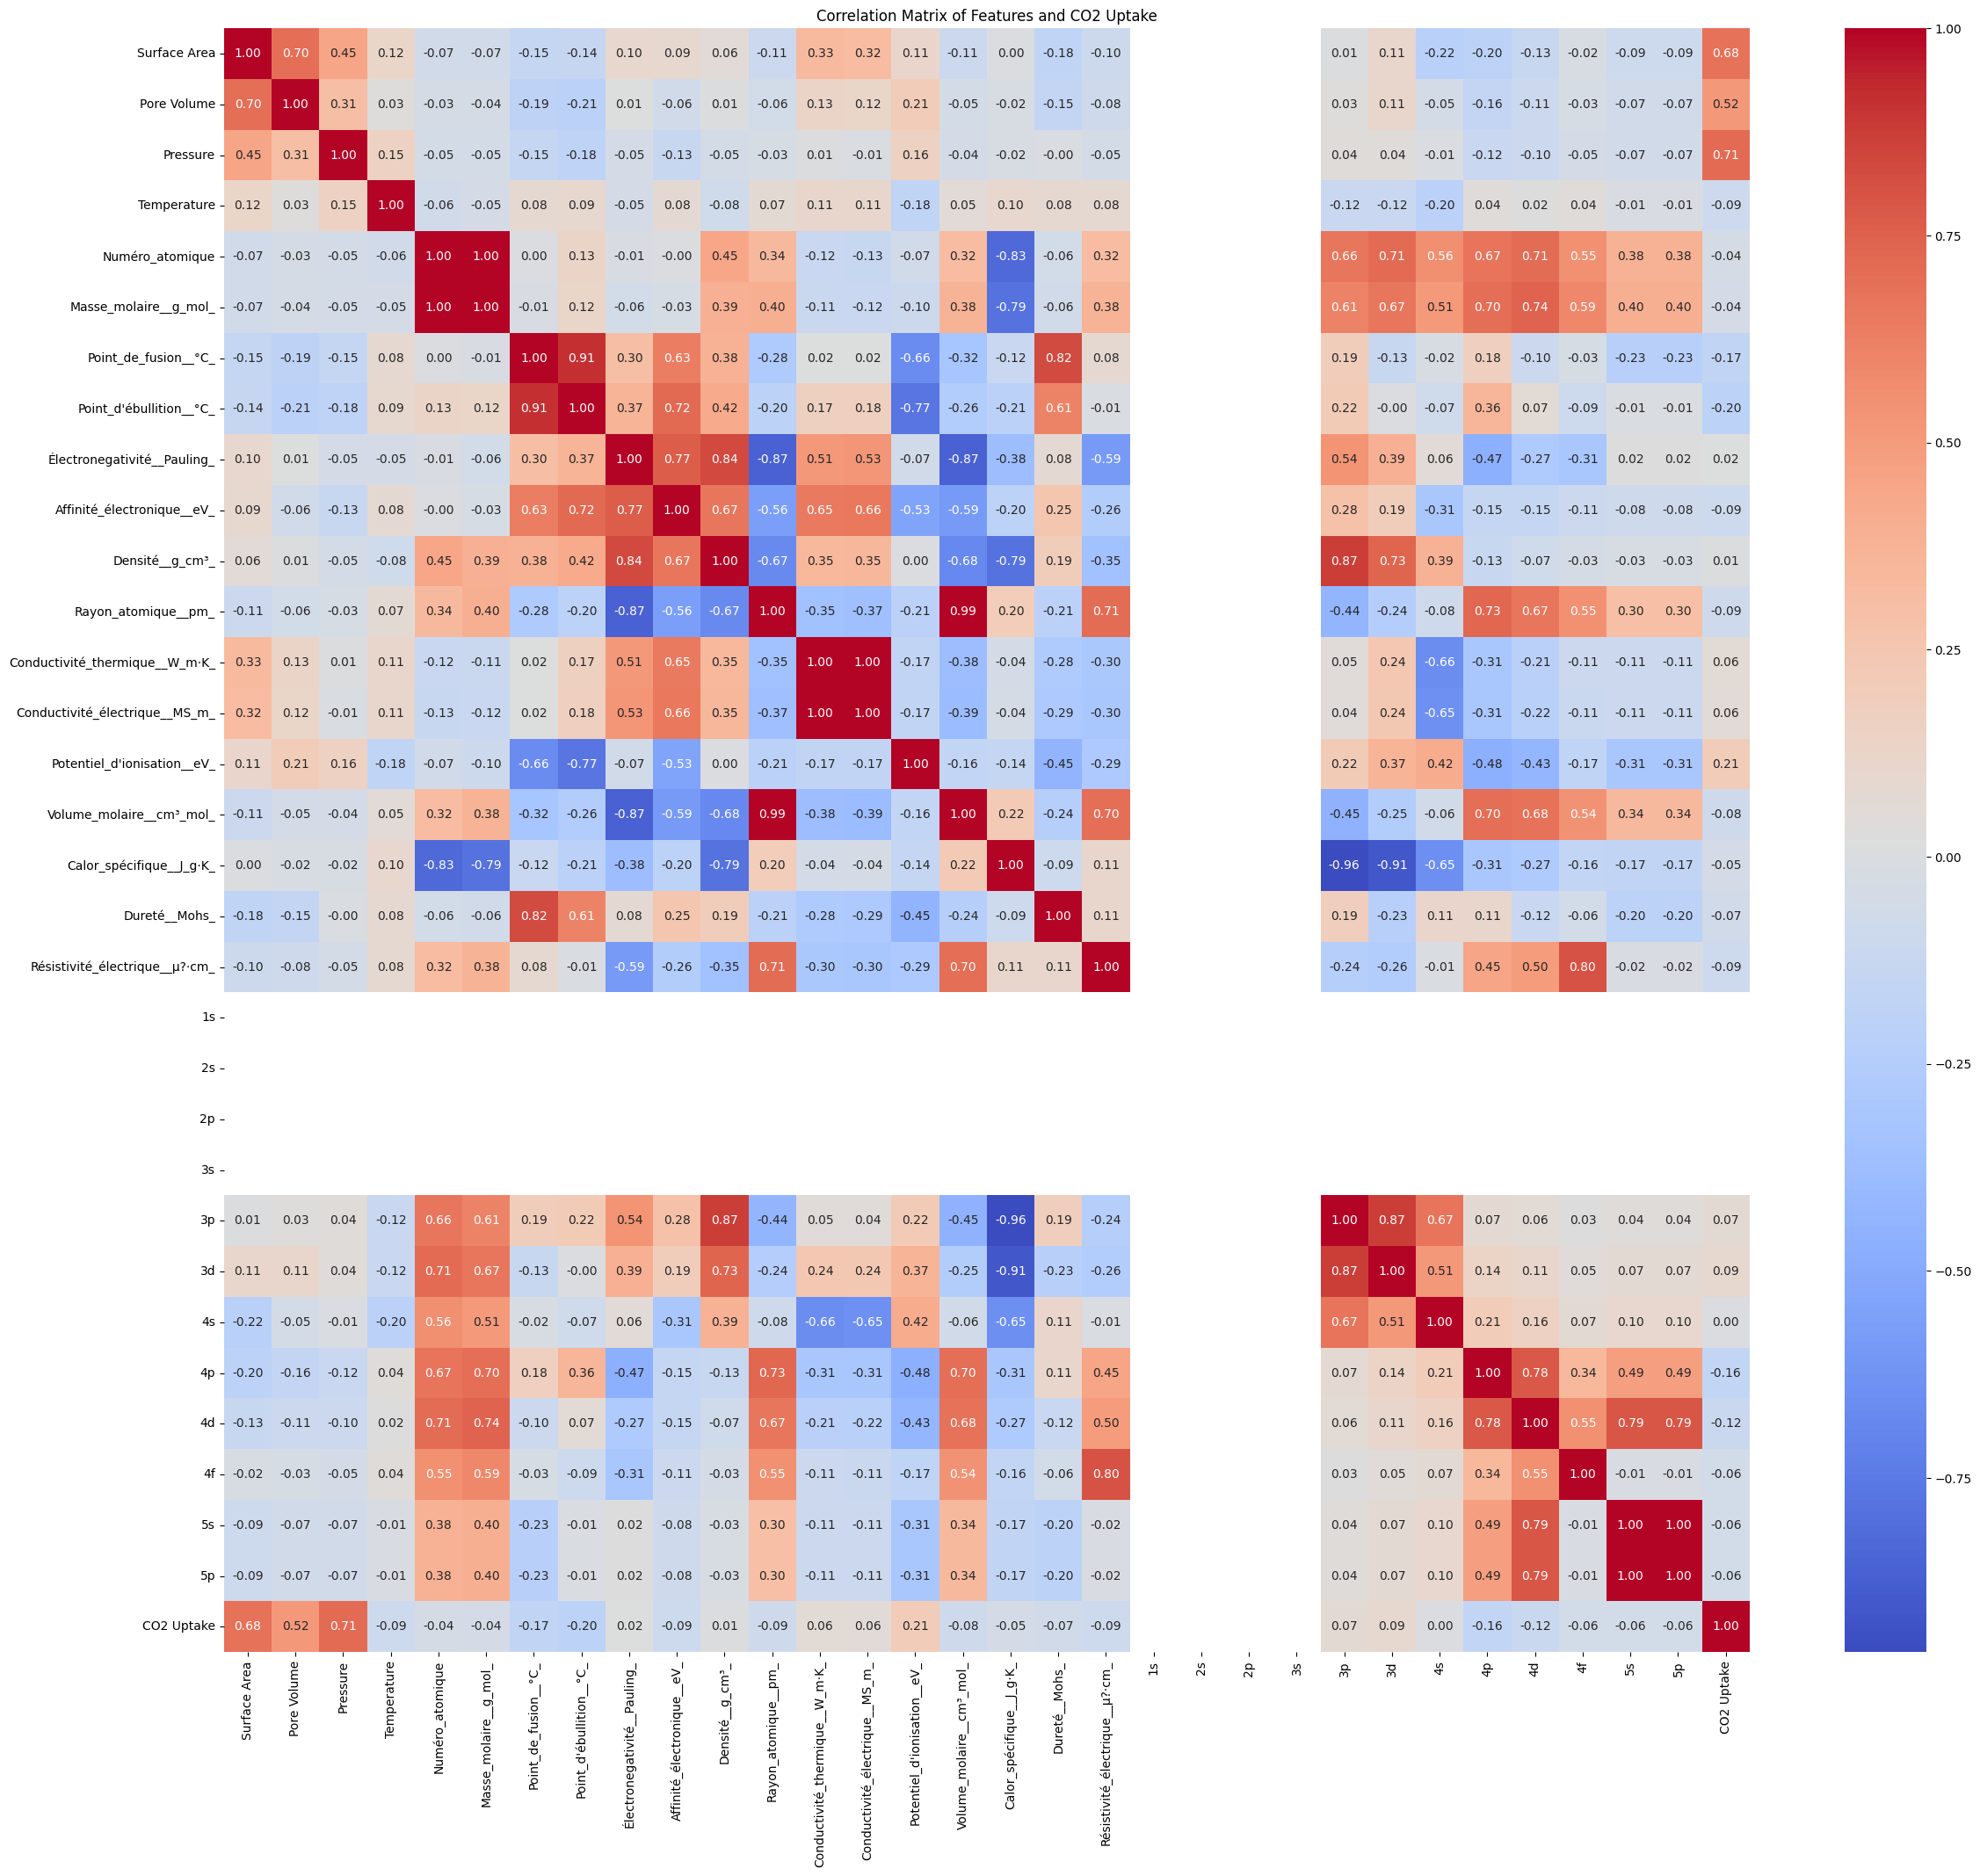

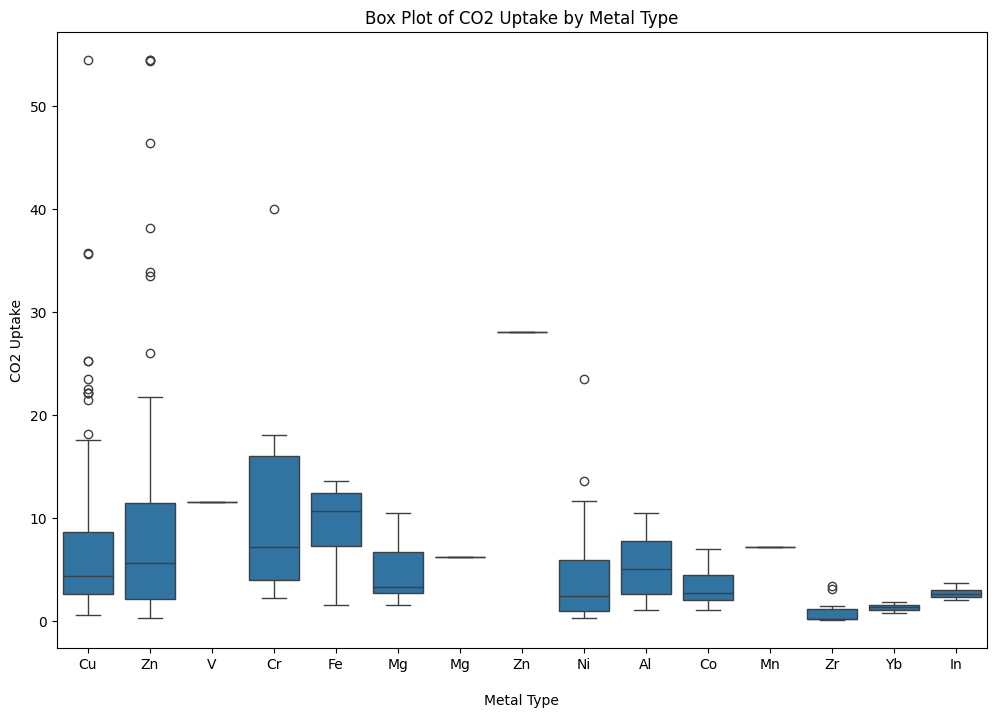

In [4]:
# Calculate the correlation matrix
data_numeric = data.select_dtypes(include=[np.number])
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(28, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and CO2 Uptake')
plt.savefig('Correlation Matrix of Features and CO2 Uptake', dpi=600)
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(x='METAL', y='CO2 Uptake', data=data)
plt.title('Box Plot of CO2 Uptake by Metal Type')
plt.xlabel('Metal Type')
plt.ylabel('CO2 Uptake')
plt.savefig('Box Plot of CO2 Uptake by Metal Type', dpi=600)
plt.show()

In [114]:
# Split the data into training and test sets
X = data.iloc[:, :33].select_dtypes(include=[np.number])
y = data.iloc[:, 33]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 55.15
R^2 Score: 0.67


In [6]:
# check for missing values
print(data.isnull().sum())

Surface Area                      0
Pore Volume                       0
Pressure                          0
Temperature                       0
METAL                             0
SMILE_Organic_linker_1            0
Numéro_atomique                   0
Masse_molaire__g_mol_             0
Point_de_fusion__°C_              0
Point_d'ébullition__°C_           0
Électronegativité__Pauling_       0
Affinité_électronique__eV_        0
Densité__g_cm³_                   0
Rayon_atomique__pm_               0
Conductivité_thermique__W_m·K_    0
Conductivité_électrique__MS_m_    0
Potentiel_d'ionisation__eV_       0
Volume_molaire__cm³_mol_          0
Calor_spécifique__J_g·K_          0
Dureté__Mohs_                     0
Résistivité_électrique__µ?·cm_    0
1s                                0
2s                                0
2p                                0
3s                                0
3p                                0
3d                                0
4s                          

In [110]:
# check for duplicate rows
print(data.duplicated().sum())

0


In [111]:
# check for inconsistent data types
print(data.dtypes)

Surface Area                      float64
Pore Volume                       float64
Pressure                          float64
Temperature                       float64
METAL                              object
SMILE_Organic_linker_1             object
Numéro_atomique                   float64
Masse_molaire__g_mol_             float64
Point_de_fusion__°C_              float64
Point_d'ébullition__°C_           float64
Électronegativité__Pauling_       float64
Affinité_électronique__eV_        float64
Densité__g_cm³_                   float64
Rayon_atomique__pm_               float64
Conductivité_thermique__W_m·K_    float64
Conductivité_électrique__MS_m_    float64
Potentiel_d'ionisation__eV_       float64
Volume_molaire__cm³_mol_          float64
Calor_spécifique__J_g·K_          float64
Dureté__Mohs_                     float64
Résistivité_électrique__µ?·cm_    float64
1s                                float64
2s                                float64
2p                                

In [9]:
# convert the 'species' column to categorical
data['METAL'] = data['METAL'].astype('category')
data['SMILE_Organic_linker_1'] = data['SMILE_Organic_linker_1'].astype('category')

In [115]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# Standardize the data
scaler = StandardScaler()

# Fit the scaler using only the training data
scaler.fit(X_train)

# Use the fitted scaler to transform the training set and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a PolynomialFeatures object with degree 2
poly = PolynomialFeatures(degree=2)

# Transform the features into polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the polynomial-transformed training data
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
coefficients = model.coef_
intercept = model.intercept_

# Display the coefficients and the intercept
print('Intercept:', intercept)
print('Coefficients:', coefficients)

Mean Squared Error: 99430293967865495552.00
R^2 Score: -1405380043168706304.00
Intercept: 13896476825.626848
Coefficients: [-1.63233675e+06  1.07942477e+08 -5.08704846e+06 -1.12129527e+07
  6.55411941e+06  1.48094755e+06  2.45592120e+06 -5.52460270e+05
  2.29599957e+04 -3.44022267e+05 -1.44978401e+06  1.72612913e+05
 -2.71956672e+05  7.93329184e+04 -5.34786460e+05  2.00128354e+05
 -8.83367452e+04 -1.17394877e+05  1.58127580e+05  8.24815676e+04
 -1.93610230e+05  1.28164232e+05  9.65653644e+04  1.22120087e+05
  2.23367401e+05  1.33376468e+04 -9.53157067e+04  1.02089300e+05
  4.91284203e+03 -6.27256984e+04 -5.71765223e+05  1.02091209e+04
  1.93715096e-07 -1.36318435e-03 -9.04677436e-05  1.62218697e-04
 -4.35996214e+05  3.63285282e+05 -1.50759249e+04  4.42270818e+03
 -1.89832946e+05 -2.93094351e+05 -7.24156959e+05 -7.76660030e+05
  5.32122206e+04 -3.64918206e+05 -5.15313229e+05  3.55481139e+05
 -4.63847727e+04  8.27786806e+05  2.30285662e+05 -6.33596808e+04
 -6.49795800e+04 -2.12608269e+05

In [533]:
# Initialize the linear regression model
model = LinearRegression()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

# Standardize the data
scaler = StandardScaler()

# Fit the scaler using only the training data
scaler.fit(X_train)

# Use the fitted scaler to transform the training set and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RFE with the model, requesting half of the features to be selected
rfe = RFE(estimator=model, n_features_to_select=len(X.columns) //4)
rfe.fit(X_train_scaled,y_train)
# Use the support_ attribute to filter columns in the original feature set X
selected_features = X.columns[rfe.support_]
print("Features selected by RFE:", selected_features)
# Create a new DataFrame with only selected features
X_new = data[selected_features]

Features selected by RFE: Index(['Surface Area', 'Pressure', 'Temperature', 'Rayon_atomique__pm_',
       'Pressure_squared', 'Pressure_cubed', 'Surface_Area_squared',
       'Surface_Area_cubed'],
      dtype='object')


In [422]:
# Initialize the linear regression model
model = LinearRegression()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()

# Fit the scaler using only the training data
scaler.fit(X_train)

# Use the fitted scaler to transform the training set and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize the SelectKBest with f_regression method
selector = SelectKBest(score_func=f_regression, k=10)  # Choose k as needed

# Fit and transform the training data
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Transform the test data
X_test_selected = selector.transform(X_test_scaled)

# Get the selected feature names
selected_features_kb = X.columns[selector.get_support()]
print("Features selected by SelectKBest:", selected_features_kb)
X_new = data[selected_features_kb]

Features selected by SelectKBest: Index(['Surface Area', 'Pore Volume', 'Pressure', 'Molecular Weight',
       'NumAtoms', 'NumAromaticRings', 'Pressure_squared', 'Pressure_cubed',
       'Surface_Area_squared', 'Surface_Area_cubed'],
      dtype='object')


In [536]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=45)

# Standardize the data
scaler = StandardScaler()

# Fit the scaler using only the training data
scaler.fit(X_train)

# Use the fitted scaler to transform the training set and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a PolynomialFeatures object with degree 2
poly = PolynomialFeatures(degree=2)

# Transform the features into polynomial features
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the polynomial-transformed training data
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 10.1142
R^2 Score: 0.9162


In [14]:
coefficients = model.coef_
intercept = model.intercept_

# Display the coefficients and the intercept
print('Intercept:', intercept)
print('Coefficients:', coefficients)
# Display the polynomial equation
feature_names = poly.get_feature_names_out(input_features=X_train.columns)
equation = "y = {:.2f}".format(intercept)
for coef, name in zip(coefficients, feature_names):
    if coef != 0:  # This line helps to avoid adding terms with a coefficient of zero
        equation += " + ({:.2f} * {})".format(coef, name)

print("Polynomial Regression Equation:")
print(equation)

Intercept: -10468853694958.137
Coefficients: [ 9.57404459e+12 -4.04632028e+00  1.01111817e+01  7.51056487e+00
  7.77307984e+11  1.89786336e+11  8.37246614e+11  2.18402626e+11
  5.80840469e+11 -1.09398950e+12  1.40404691e+00 -3.21330808e+00
 -1.43064782e+00 -6.31285937e+00  5.53612992e+01  4.57473811e+01
 -2.06202359e+01 -1.99327728e+01 -1.18490869e+00 -3.34238486e-01
  6.41361529e+00  8.81145701e+00 -6.82903760e+01 -5.40775530e+01
  2.45316245e+01  2.53527738e+01  1.39586995e+00 -2.26768749e+00
  2.33138064e+00 -6.12229301e+00 -5.93814157e+00 -4.70265724e-01
  3.03651042e+00 -4.54528809e-01 -1.83736428e+12  1.13914825e+11
 -1.56988535e+11 -5.33554099e+10 -4.75128801e+11 -1.32380419e+12
  1.57536561e+12 -1.56994874e+12 -1.10422843e+12 -1.35947429e+12
  3.79221262e+11 -1.33482719e+12 -2.43048526e+11  9.99403983e+10
  9.72801077e+11  5.06220946e+11  1.22875335e+12 -9.39016009e+11
  9.41269083e+11 -1.05595752e+12  1.38019495e+12]
Polynomial Regression Equation:
y = -10468853694958.14 + (95

In [537]:
# Define the pipeline with a placeholder for the degree of polynomial features
poly_model = make_pipeline(PolynomialFeatures(), LinearRegression())

# Setup cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Setup the parameter grid for grid search
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3]
}

# Initialize Grid Search
grid_search = GridSearchCV(poly_model, param_grid, cv=kf, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best parameters from grid search:", grid_search.best_params_)

# Evaluate the model using the best parameters found by Grid Search
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)
mse_grid = mean_squared_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)
print(f"Grid Search - Mean Squared Error: {mse_grid:.2f}")
print(f"Grid Search - R^2 Score: {r2_grid:.2f}")

# Setup the parameter distribution for randomized search
param_dist = {
    'polynomialfeatures__degree': randint(1, 4)
}

# Initialize Randomized Search
random_search = RandomizedSearchCV(poly_model, param_distributions=param_dist, n_iter=10, cv=kf, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)
print("Best parameters from randomized search:", random_search.best_params_)

# Evaluate the model using the best parameters found by Randomized Search
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)
print(f"Randomized Search - Mean Squared Error: {mse_random:.2f}")
print(f"Randomized Search - R^2 Score: {r2_random:.2f}")

Best parameters from grid search: {'polynomialfeatures__degree': 1}
Grid Search - Mean Squared Error: 39.92
Grid Search - R^2 Score: 0.67
Best parameters from randomized search: {'polynomialfeatures__degree': 1}
Randomized Search - Mean Squared Error: 39.92
Randomized Search - R^2 Score: 0.67


In [538]:
# Define the polynomial feature transformation and linear regression model
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=43)

# Standardize the data
scaler = StandardScaler()

# Fit the scaler using only the training data
scaler.fit(X_train)

# Use the fitted scaler to transform the training set and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the polynomial model on the training data
poly_model.fit(X_train_scaled, y_train)

# Get coefficients from the linear regression model within the pipeline
coefficients = poly_model.named_steps['linearregression'].coef_
intercept = poly_model.named_steps['linearregression'].intercept_
print("Model coefficients:", coefficients)
print("Model intercept:", intercept)

# Predict on the testing set
y_pred = poly_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Model coefficients: [-2.95410682e+14  7.42582588e+00  6.86490782e+00  4.39540224e+00
  5.44817779e+00 -1.41492725e+01  1.74933161e+01 -1.26697206e+00
  8.45567842e+00 -2.35225827e+01 -6.65576231e+01 -5.39910367e+00
  2.40795990e+01  2.38952553e+02 -1.92818599e+02  3.20626006e+01
 -2.55160255e+01 -5.41389466e+01  1.80834948e+01 -3.59850974e+01
  6.97681107e+01 -4.53367107e+00  1.98802560e+02 -1.39857355e+02
 -1.28225300e+00 -1.37670172e+01 -4.16678805e+01  8.96914445e+01
  6.04004105e+00 -1.64591209e+01  1.21506044e+00  4.61930043e+01
  1.65398157e+00 -1.66062667e+01 -9.60757297e+00  2.17477954e+01
 -9.87430332e+01 -4.86977355e+02  3.00336154e+02  5.01111636e+01
  3.33925488e+02 -1.85862125e+02 -1.05329102e+01  2.64299248e+01
 -7.92153655e+00]
Model intercept: 295410681636311.25
Mean Squared Error: 385.35
R^2 Score: -3.39


In [547]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=45)

# Standardize the data
scaler = StandardScaler()

# Fit the scaler using only the training data
scaler.fit(X_train)

# Use the fitted scaler to transform the training set and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate metrics to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 26.5304
R^2 Score: 0.7801


In [548]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Define the model
rf_model = RandomForestRegressor(random_state=44)

# Setup cross-validation method
kf = KFold(n_splits=5, shuffle=True)

# Setup the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
grid_search = GridSearchCV(rf_model, param_grid, cv=kf, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best parameters from grid search:", grid_search.best_params_)

# Evaluate the model using the best parameters found by Grid Search
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)
mse_grid = mean_squared_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)
print(f"Grid Search - Mean Squared Error: {mse_grid:.2f}")
print(f"Grid Search - R^2 Score: {r2_grid:.2f}")

# Setup the parameter distribution for randomized search
param_dist = {
    'n_estimators': randint(100, 301),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11)
}

# Initialize Randomized Search
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=kf, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)
print("Best parameters from randomized search:", random_search.best_params_)

# Evaluate the model using the best parameters found by Randomized Search
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)
print(f"Randomized Search - Mean Squared Error: {mse_random:.2f}")
print(f"Randomized Search - R^2 Score: {r2_random:.2f}")


Best parameters from grid search: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Grid Search - Mean Squared Error: 21.45
Grid Search - R^2 Score: 0.82
Best parameters from randomized search: {'max_depth': 20, 'min_samples_split': 8, 'n_estimators': 174}
Randomized Search - Mean Squared Error: 25.15
Randomized Search - R^2 Score: 0.79


In [559]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

# Standardize the data
scaler = StandardScaler()

# Fit the scaler using only the training data
scaler.fit(X_train)

# Use the fitted scaler to transform the training set and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Support Vector Regression model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Default RBF kernel, adjust C and epsilon as needed

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate metrics to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error: 19.9497
R^2 Score: 0.5749


In [560]:
from sklearn.svm import SVR
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import expon

# Define the SVR model
svr_model = SVR()

# Setup cross-validation method (using fewer folds to speed up)
kf = KFold(n_splits=3, shuffle=True, random_state=44)

# Setup the parameter distribution for randomized search with fewer iterations
param_dist = {
    'C': expon(scale=10),  # Exponential distribution for C
    'kernel': ['rbf'],  # Reduced to one kernel type for initial exploration
    'epsilon': expon(scale=0.1)  # Exponential distribution for epsilon
}

# Initialize Randomized Search with parallel processing
random_search = RandomizedSearchCV(svr_model, param_distributions=param_dist, n_iter=5, cv=kf, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
print("Best parameters from randomized search:", random_search.best_params_)

# Evaluate the model using the best parameters found by Randomized Search
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)
print(f"Randomized Search - Mean Squared Error: {mse_random:.2f}")
print(f"Randomized Search - R^2 Score: {r2_random:.2f}")

KeyboardInterrupt: 

In [566]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=64)

# Standardize the data
scaler = StandardScaler()

# Fit the scaler using only the training data
scaler.fit(X_train)

# Use the fitted scaler to transform the training set and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=45)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate metrics to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 18.5628
R^2 Score: 0.8354


In [508]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint, uniform

# Define the GBM model
gbm_model = GradientBoostingRegressor(random_state=45)

# Setup cross-validation method
kf = KFold(n_splits=5, shuffle=True)

# Setup the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],  # Typically GBM does not require very deep trees
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
grid_search = GridSearchCV(gbm_model, param_grid, cv=kf, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best parameters from grid search:", grid_search.best_params_)

# Evaluate the model using the best parameters found by Grid Search
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)
mse_grid = mean_squared_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)
print(f"Grid Search - Mean Squared Error: {mse_grid:.2f}")
print(f"Grid Search - R^2 Score: {r2_grid:.2f}")

# Setup the parameter distribution for randomized search
param_dist = {
    'n_estimators': randint(100, 301),
    'max_depth': randint(2, 8),  # Shallower trees are generally sufficient for GBM
    'learning_rate': uniform(0.01, 0.2),  # Continuous distribution over the learning rate
    'min_samples_split': randint(2, 11)
}

# Initialize Randomized Search
random_search = RandomizedSearchCV(gbm_model, param_distributions=param_dist, n_iter=10, cv=kf, scoring='r2', random_state=55)
random_search.fit(X_train, y_train)
print("Best parameters from randomized search:", random_search.best_params_)

# Evaluate the model using the best parameters found by Randomized Search
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)
print(f"Randomized Search - Mean Squared Error: {mse_random:.2f}")
print(f"Randomized Search - R^2 Score: {r2_random:.2f}")


KeyboardInterrupt: 

In [568]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=55)

# Standardize the data
scaler = StandardScaler()

# Fit the scaler using only the training data
scaler.fit(X_train)

# Use the fitted scaler to transform the training set and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost Regressor model
model = XGBRegressor(n_estimators=100, random_state=6)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate metrics to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 18.7202
R^2 Score: 0.7680


In [523]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint, uniform

# Define the XGBoost model
xgb_model = XGBRegressor(random_state=52)

# Setup cross-validation method
kf = KFold(n_splits=3, shuffle=True)

# Setup the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 2, 5],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, cv=kf, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best parameters from grid search:", grid_search.best_params_)

# Evaluate the model using the best parameters found by Grid Search
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)
mse_grid = mean_squared_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)
print(f"Grid Search - Mean Squared Error: {mse_grid:.2f}")
print(f"Grid Search - R^2 Score: {r2_grid:.2f}")

# Setup the parameter distribution for randomized search
param_dist = {
    'n_estimators': randint(100, 301),
    'max_depth': randint(3, 11),
    'learning_rate': uniform(0.01, 0.2),
    'min_child_weight': randint(1, 6),
    'subsample': uniform(0.6, 0.4)
}

# Initialize Randomized Search
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=kf, scoring='r2', random_state=52)
random_search.fit(X_train, y_train)
print("Best parameters from randomized search:", random_search.best_params_)

# Evaluate the model using the best parameters found by Randomized Search
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)
print(f"Randomized Search - Mean Squared Error: {mse_random:.2f}")
print(f"Randomized Search - R^2 Score: {r2_random:.2f}")


Best parameters from grid search: {'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.7}
Grid Search - Mean Squared Error: 25.16
Grid Search - R^2 Score: 0.69
Best parameters from randomized search: {'learning_rate': 0.05347645139180621, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 154, 'subsample': 0.8660160464575457}
Randomized Search - Mean Squared Error: 13.89
Randomized Search - R^2 Score: 0.83


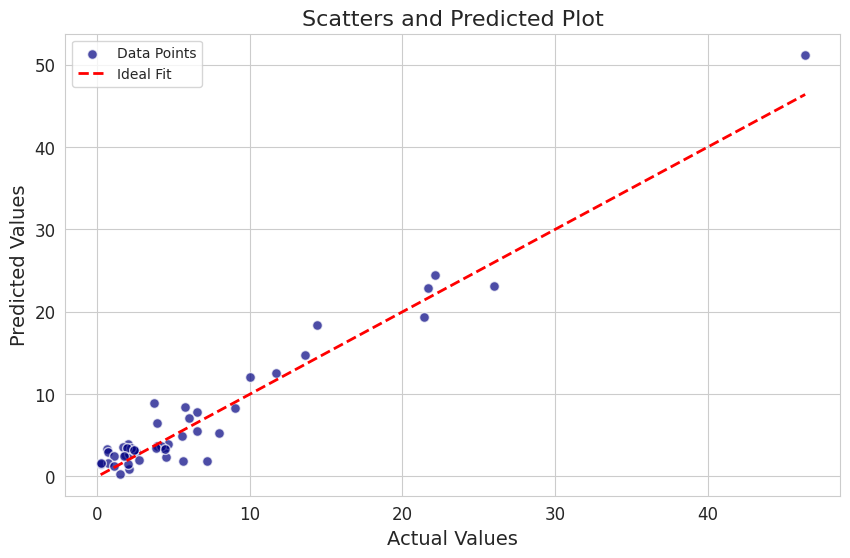

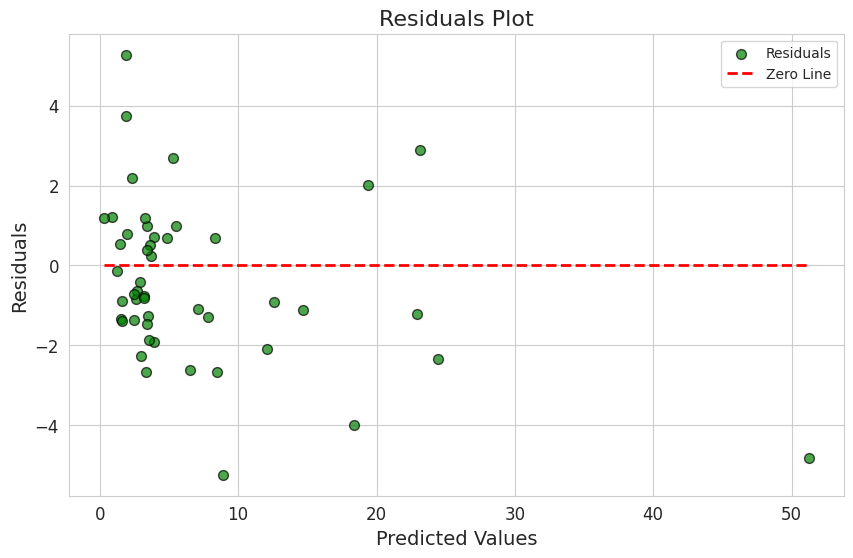

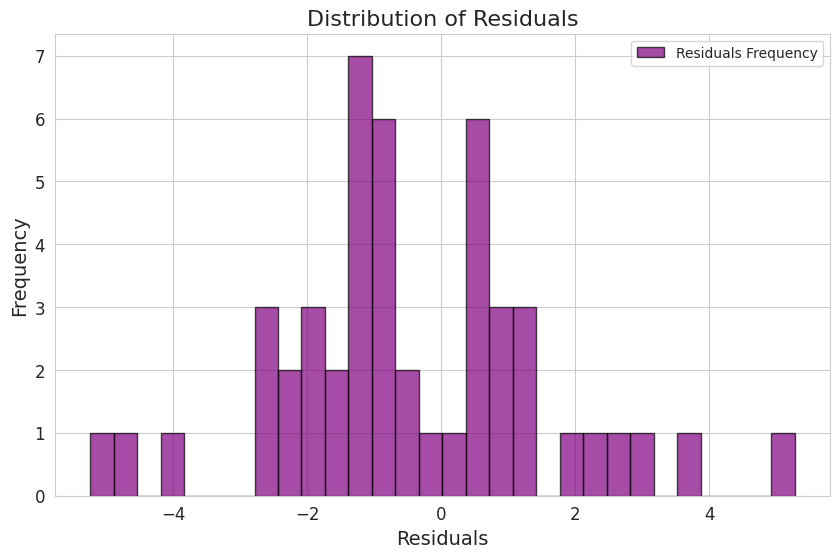

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set_style("whitegrid")

# Assuming y_test and y_pred are defined
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='navy', edgecolor='white', s=50, label='Data Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Scatters and Predicted Plot', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper left')  # Add legend
plt.savefig('Actual_vs_Predicted_Values.png', dpi=600)  # Correct filename and format
plt.show()

# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='green', edgecolor='black', s=50, label='Residuals')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyle='--', linewidth=2, label='Zero Line')
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals Plot', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right')  # Add legend
plt.savefig('Residuals_Plot.png', dpi=600)  # Correct filename and format
plt.show()

# plt.figure(figsize=(10, 6))
# plt.hist(residuals, bins=30, alpha=0.7, color='purple', edgecolor='black', label='Residuals Frequency')
# plt.xlabel('Residuals', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.title('Distribution of Residuals', fontsize=16)
# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.legend(loc='upper right')  # Add legend
# plt.savefig('Distribution_of_Residuals.png', dpi=600)  # Correct filename and format
# plt.show()


In [524]:
# Import the Rdkit library to analyze smile and generate new features based on molecular structure.
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DATA BASE_CO2 Uptake Prediction in Metal–Organic Frameworks finale.csv', encoding='latin1')
data = data.dropna(how='all')
data = data.dropna(how='all',axis=1)
# Perform feature engineering
data['Pressure_squared'] = data['Pressure'] ** 2
data['Pressure_cubed'] = data['Pressure'] ** 3
data['Surface_Area_squared'] = data['Surface Area'] ** 2
data['Surface_Area_cubed'] = data['Surface Area'] ** 3
X = data.iloc[:, :33].join(data.iloc[:, 34:]).select_dtypes(include=[np.number])
y = data.iloc[:, 33]
# Display the updated dataset
data

,Surface Area,Pore Volume,Pressure,Temperature,METAL,SMILE_Organic_linker_1,Numéro_atomique,Masse_molaire__g_mol_,Point_de_fusion__°C_,Point_d'ébullition__°C_,...,4p,4d,4f,5s,5p,CO2 Uptake,Pressure_squared,Pressure_cubed,Surface_Area_squared,Surface_Area_cubed
0,1270.0,0.71,0.15,298.0,Cu,OC(=O)C1=CC(=CC(=C1)C(O)=O)C(O)=O,29.0,63.55,1085.0,2562.0,...,0.0,0.0,0.0,0.0,0.0,0.86,0.0225,0.003375,1612900.0,2.048383e+09
1,1270.0,0.71,1.00,298.0,Cu,OC(=O)C1=CC(=CC(=C1)C(O)=O)C(O)=O,29.0,63.55,1085.0,2562.0,...,0.0,0.0,0.0,0.0,0.0,5.27,1.0000,1.000000,1612900.0,2.048383e+09
2,1270.0,0.71,1.00,313.0,Cu,OC(=O)C1=CC(=CC(=C1)C(O)=O)C(O)=O,29.0,63.55,1085.0,2562.0,...,0.0,0.0,0.0,0.0,0.0,2.91,1.0000,1.000000,1612900.0,2.048383e+09
3,2833.0,1.04,35.00,298.0,Zn,C(=O)(C1=CC=C(C=C1)C(=O)O),30.0,65.38,419.5,907.0,...,0.0,0.0,0.0,0.0,0.0,21.70,1225.0000,42875.000000,8025889.0,2.273734e+10
4,1568.0,1.07,35.00,298.0,Zn,C(=O)(C1=CC(=CC=C1C(=O)O)N)O,30.0,65.38,419.5,907.0,...,0.0,0.0,0.0,0.0,0.0,18.70,1225.0000,42875.000000,2458624.0,3.855122e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,147.0,0.10,1.00,298.0,Cu,FC(F)(F)C(C1=CC(=CC=C1)C(=O)O)C2=CC(=CC=C2)C(=O)O,29.0,63.55,1085.0,2562.0,...,0.0,0.0,0.0,0.0,0.0,2.11,1.0000,1.000000,21609.0,3.176523e+06
232,2850.0,1.00,1.00,273.0,Cu,C1=CC=C(C(=C1)C(=O)O)C2=NN=CC(=C2)C(=O)O,29.0,63.55,1085.0,2562.0,...,0.0,0.0,0.0,0.0,0.0,8.75,1.0000,1.000000,8122500.0,2.314912e+10
233,2850.0,1.00,0.15,273.0,Cu,C1=CC=C(C(=C1)C(=O)O)C2=NN=CC(=C2)C(=O)O,29.0,63.55,1085.0,2562.0,...,0.0,0.0,0.0,0.0,0.0,1.83,0.0225,0.003375,8122500.0,2.314912e+10
234,704.0,0.28,1.00,298.0,Zn,C1=CC(=CC=C1C2=CC(=C(C=C2)N(C3=CC=C(C=C3)C(=O)...,30.0,65.38,419.5,907.0,...,0.0,0.0,0.0,0.0,0.0,1.16,1.0000,1.000000,495616.0,3.489137e+08


In [305]:
# Initialize the linear regression model
model = LinearRegression()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=443)

# Standardize the data
scaler = StandardScaler()

# Fit the scaler using only the training data
scaler.fit(X_train)

# Use the fitted scaler to transform the training set and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RFE with the model, requesting half of the features to be selected
rfe = RFE(estimator=model, n_features_to_select=len(X.columns) // 4)
rfe.fit(X_train_scaled,y_train)
# Use the support_ attribute to filter columns in the original feature set X
selected_features = X.columns[rfe.support_]
print("Features selected by RFE:", selected_features)
# Create a new DataFrame with only selected features
X_new = data[selected_features]

Features selected by RFE: Index(['Pressure', 'Temperature', 'Résistivité_électrique__µ?·cm_',
       'Molecular Weight', 'NumAtoms', 'NumRotatableBonds', 'NumAromaticRings',
       'Pressure_squared', 'Pressure_cubed', 'Surface_Area_squared'],
      dtype='object')


In [306]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=40)

# Standardize the data
scaler = StandardScaler()

# Fit the scaler using only the training data
scaler.fit(X_train)

# Use the fitted scaler to transform the training set and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a PolynomialFeatures object with degree 2
poly = PolynomialFeatures(degree=2)

# Transform the features into polynomial features
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the polynomial-transformed training data
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 264.8730
R^2 Score: -2.5536


In [206]:
# Import the Rdkit library to analyze smile and generate new features based on molecular structure.
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DATA BASE_CO2 Uptake Prediction in Metal–Organic Frameworks finale.csv', encoding='latin1')
data = data.dropna(how='all')
data = data.dropna(how='all',axis=1)
# Extract smiles
smiles_list = data.iloc[:,5]
# Initialize lists to store descriptor values
molecular_weights = []
num_atoms_list = []
num_rotatable_bonds_list = []
num_aromatic_rings_list = []
num_h_acceptors_list = []
num_h_donors_list = []

# Iterate through each SMILES string
for smiles in smiles_list:
    try:
        # Convert SMILES string to RDKit molecule object
        mol = Chem.MolFromSmiles(smiles)

        # Check if molecule is successfully parsed
        if mol is not None:
            # Calculate descriptors
            mol_weight = Descriptors.MolWt(mol)
            num_atoms = mol.GetNumAtoms()
            num_rotatable_bonds = Descriptors.NumRotatableBonds(mol)
            num_aromatic_rings = Descriptors.NumAromaticRings(mol)
            num_h_acceptors = Descriptors.NumHAcceptors(mol)
            num_h_donors = Descriptors.NumHDonors(mol)

            # Append descriptor values to respective lists
            molecular_weights.append(mol_weight)
            num_atoms_list.append(num_atoms)
            num_rotatable_bonds_list.append(num_rotatable_bonds)
            num_aromatic_rings_list.append(num_aromatic_rings)
            num_h_acceptors_list.append(num_h_acceptors)
            num_h_donors_list.append(num_h_donors)
        else:
            # If molecule parsing failed, append None to all descriptor lists
            molecular_weights.append(None)
            num_atoms_list.append(None)
            num_rotatable_bonds_list.append(None)
            num_aromatic_rings_list.append(None)
            num_h_acceptors_list.append(None)
            num_h_donors_list.append(None)
    except:
        # If an error occurs during parsing, append None to all descriptor lists
        molecular_weights.append(None)
        num_atoms_list.append(None)
        num_rotatable_bonds_list.append(None)
        num_aromatic_rings_list.append(None)
        num_h_acceptors_list.append(None)
        num_h_donors_list.append(None)

# Add descriptor columns to the dataset
data['Molecular Weight'] = molecular_weights
data['NumAtoms'] = num_atoms_list
data['NumRotatableBonds'] = num_rotatable_bonds_list
data['NumAromaticRings'] = num_aromatic_rings_list
data['NumHAcceptors'] = num_h_acceptors_list
data['NumHDonors'] = num_h_donors_list
# Perform feature engineering
data['Pressure_squared'] = data['Pressure'] ** 2
data['Pressure_cubed'] = data['Pressure'] ** 3
data['Surface_Area_squared'] = data['Surface Area'] ** 2
data['Surface_Area_cubed'] = data['Surface Area'] ** 3
X = data.iloc[:, :33].join(data.iloc[:, 34:]).select_dtypes(include=[np.number])
y = data.iloc[:, 33]


[09:48:16] SMILES Parse Error: syntax error while parsing: C1=CC=C(C=C1)C2=NC3=NC=C(N3C4=NC=C(C=C4)C5=C(C=CC(=C5)Cl)O)C=C2,Cl,Cl
[09:48:16] SMILES Parse Error: Failed parsing SMILES 'C1=CC=C(C=C1)C2=NC3=NC=C(N3C4=NC=C(C=C4)C5=C(C=CC(=C5)Cl)O)C=C2,Cl,Cl' for input: 'C1=CC=C(C=C1)C2=NC3=NC=C(N3C4=NC=C(C=C4)C5=C(C=CC(=C5)Cl)O)C=C2,Cl,Cl'
[09:48:16] SMILES Parse Error: syntax error while parsing: C1=CC=C(C=C1)C2=NC3=NC=C(N3C4=NC=C(C=C4)C5=C(C=CC(=C5)Cl)O)C=C2,Cl,Cl
[09:48:16] SMILES Parse Error: Failed parsing SMILES 'C1=CC=C(C=C1)C2=NC3=NC=C(N3C4=NC=C(C=C4)C5=C(C=CC(=C5)Cl)O)C=C2,Cl,Cl' for input: 'C1=CC=C(C=C1)C2=NC3=NC=C(N3C4=NC=C(C=C4)C5=C(C=CC(=C5)Cl)O)C=C2,Cl,Cl'
[09:48:16] SMILES Parse Error: unclosed ring for input: 'C1=CC=C(C=C1)C2=C3C(=C(C=C2)C(=O)O)N=N4'
[09:48:16] SMILES Parse Error: syntax error while parsing: C1=CC(=CC=C1C2=NC3=CC=CC=C3S2)C(=O)O,C1=CC(=CC=C1C2=NC3=CC=CC=C3S2)C(=O)O
[09:48:16] SMILES Parse Error: Failed parsing SMILES 'C1=CC(=CC=C1C2=NC3=CC=CC=C3S2)C(=O)O,C1=C

In [207]:
# check for missing values
print(data.isnull().sum())

Surface Area                       0
Pore Volume                        0
Pressure                           0
Temperature                        0
METAL                              0
SMILE_Organic_linker_1             0
Numéro_atomique                    0
Masse_molaire__g_mol_              0
Point_de_fusion__°C_               0
Point_d'ébullition__°C_            0
Électronegativité__Pauling_        0
Affinité_électronique__eV_         0
Densité__g_cm³_                    0
Rayon_atomique__pm_                0
Conductivité_thermique__W_m·K_     0
Conductivité_électrique__MS_m_     0
Potentiel_d'ionisation__eV_        0
Volume_molaire__cm³_mol_           0
Calor_spécifique__J_g·K_           0
Dureté__Mohs_                      0
Résistivité_électrique__µ?·cm_     0
1s                                 0
2s                                 0
2p                                 0
3s                                 0
3p                                 0
3d                                 0
4

In [208]:
# Calculate the mean of numeric columns only
numeric_cols = data.select_dtypes(include=['number'])  # This selects only numeric columns
mean_values = numeric_cols.mean()
# Apply the means to fill missing values in numeric columns only
data[numeric_cols.columns] = numeric_cols.fillna(mean_values)
# check for missing values
print(data.isnull().sum())

Surface Area                      0
Pore Volume                       0
Pressure                          0
Temperature                       0
METAL                             0
SMILE_Organic_linker_1            0
Numéro_atomique                   0
Masse_molaire__g_mol_             0
Point_de_fusion__°C_              0
Point_d'ébullition__°C_           0
Électronegativité__Pauling_       0
Affinité_électronique__eV_        0
Densité__g_cm³_                   0
Rayon_atomique__pm_               0
Conductivité_thermique__W_m·K_    0
Conductivité_électrique__MS_m_    0
Potentiel_d'ionisation__eV_       0
Volume_molaire__cm³_mol_          0
Calor_spécifique__J_g·K_          0
Dureté__Mohs_                     0
Résistivité_électrique__µ?·cm_    0
1s                                0
2s                                0
2p                                0
3s                                0
3p                                0
3d                                0
4s                          

In [209]:
# Display the updated dataset
X = data.iloc[:, :33].join(data.iloc[:, 34:]).select_dtypes(include=[np.number])
y = data.iloc[:, 33]
data
# Initialize the linear regression model
model = LinearRegression()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Standardize the data
scaler = StandardScaler()

# Fit the scaler using only the training data
scaler.fit(X_train)

# Use the fitted scaler to transform the training set and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RFE with the model, requesting half of the features to be selected
rfe = RFE(estimator=model, n_features_to_select=len(X.columns) // 6)
rfe.fit(X_train_scaled,y_train)
# Use the support_ attribute to filter columns in the original feature set X
selected_features = X.columns[rfe.support_]
print("Features selected by RFE:", selected_features)
# Create a new DataFrame with only selected features
X_new = data[selected_features]

Features selected by RFE: Index(['Pressure', 'Molecular Weight', 'NumAtoms', 'Pressure_squared',
       'Pressure_cubed', 'Surface_Area_squared'],
      dtype='object')


In [98]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=49)

# Standardize the data
scaler = StandardScaler()

# Fit the scaler using only the training data
scaler.fit(X_train)

# Use the fitted scaler to transform the training set and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a PolynomialFeatures object with degree 2
poly = PolynomialFeatures(degree=2)

# Transform the features into polynomial features
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the polynomial-transformed training data
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 8.6583
R^2 Score: 0.9175
